<a href="https://colab.research.google.com/github/julioferreirah/Inteligencia-Artificial/blob/main/TrabalhoIA_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Inteligência Artificial - Implementação de MLP

## Modelo

 ### Importando Bibliotecas


In [128]:
import numpy as np
import time as t
import matplotlib.pyplot as plt
%matplotlib inline

### Modelo sem parada antecipada

In [178]:
# Função de ativação tangente hiperbólica
def tanh(x):
    return np.tanh(x)

# Função de perda - Erro Quadrático Médio
def erro_quadratico(y_dado, y_predito):
    return np.mean((y_dado - y_predito) ** 2)

class MLP:
    def __init__(self, tamanho_entrada, tamanho_escondida, tamanho_saida):
        # Inicialização dos pesos
        self.W1 = np.random.randn(tamanho_entrada, tamanho_escondida)
        self.b1 = np.zeros((1, tamanho_escondida))
        self.W2 = np.random.randn(tamanho_escondida, tamanho_saida)
        self.b2 = np.zeros((1, tamanho_saida))

    def feedforward(self, X):
        # Camada oculta
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = tanh(self.z1)

        # Camada de saída
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = tanh(self.z2)

        return self.a2

    def backpropagation(self, X, y, y_predito, taxa_aprendizado):
        # Gradiente da camada de saída
        delta2 = (y_predito - y) * (1 - tanh(self.z2) ** 2)
        dW2 = np.dot(self.a1.T, delta2)
        db2 = delta2.sum(axis=0, keepdims=True)

        # Gradiente da camada oculta
        delta1 = np.dot(delta2, self.W2.T) * (1 - tanh(self.z1) ** 2)
        dW1 = np.dot(X.T, delta1)
        db1 = delta1.sum(axis=0)

        # Atualização dos pesos
        self.W2 -= taxa_aprendizado * dW2
        self.b2 -= taxa_aprendizado * db2
        self.W1 -= taxa_aprendizado * dW1
        self.b1 -= taxa_aprendizado * db1

    def train(self, X, y, epochs, taxa_aprendizado):
        v = []
        count = 0
        for  i in range(epochs) :
            # Feedforward
            y_predito = self.feedforward(X)

            # Backpropagation
            self.backpropagation(X, y, y_predito, taxa_aprendizado)

            # Cálculo do erro
            loss = erro_quadratico(y, y_predito)

            # A cada 10 épocas: registra erro e diminui tx de aprendizado
            if i % 10 == 0:
                v.append(loss)
                taxa_aprendizado = taxa_aprendizado*0.95
                count += 1

            #condição parada
            if float(taxa_aprendizado) < 0.01:
              break


        #quando parou
        print("Parada na época ", i +1)
        print("Taxa de aprendizado ", taxa_aprendizado)

        #plot do erro
        plt.plot(range(0, count*10, 10), v)
        plt.xlabel('Épocas')
        plt.ylabel('Erro Quadrático Médio')
        plt.title('Histórico de Erro durante o Treinamento')
        plt.show()


### Modelo com parada antecipada

In [106]:
# Função de ativação tangente hiperbólica
def tanh(x):
    return np.tanh(x)

# Função de perda - Erro Quadrático Médio
def erro_quadratico(y_dado, y_predito):
    return ((y_dado - y_predito) ** 2).mean()

class MLPp:
    def __init__(self, tamanho_entrada, tamanho_escondida, tamanho_saida):
        # Inicialização dos pesos
        self.W1 = np.random.randn(tamanho_entrada, tamanho_escondida)
        self.b1 = np.zeros((1, tamanho_escondida))
        self.W2 = np.random.randn(tamanho_escondida, tamanho_saida)
        self.b2 = np.zeros((1, tamanho_saida))

    def feedforward(self, X):
        # Camada oculta
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = tanh(self.z1)

        # Camada de saída
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = tanh(self.z2)

        return self.a2

    def backpropagation(self, X, y, y_predito, taxa_aprendizado):
        # Gradiente da camada de saída
        delta2 = (y_predito - y) * (1 - tanh(self.z2) ** 2)
        dW2 = np.dot(self.a1.T, delta2)
        db2 = delta2.sum(axis=0, keepdims=True)

        # Gradiente da camada oculta
        delta1 = np.dot(delta2, self.W2.T) * (1 - tanh(self.z1) ** 2)
        dW1 = np.dot(X.T, delta1)
        db1 = delta1.sum(axis=0)

        # Atualização dos pesos
        self.W2 -= taxa_aprendizado * dW2
        self.b2 -= taxa_aprendizado * db2
        self.W1 -= taxa_aprendizado * dW1
        self.b1 -= taxa_aprendizado * db1

    def train(self, X, y, epochs, taxa_aprendizado):
        v = []
        i = 0
        while (i < (epochs) & taxa_aprendizado > 0.05 &  ):
            # Feedforward
            y_predito = self.feedforward(X)

            # Backpropagation
            self.backpropagation(X, y, y_predito, taxa_aprendizado)

            # Cálculo do erro
            loss = erro_quadratico(y, y_predito)

            # Impressão do erro a cada 10 épocas
            if i % 10 == 0:
                v.append(loss)
            i += 1

        plt.plot(range(0, epochs, 10), v)
        plt.xlabel('Épocas')
        plt.ylabel('Erro Quadrático Médio')
        plt.title('Histórico de Erro durante o Treinamento')
        plt.show()


SyntaxError: ignored

#Aplicação do Modelo

## Portas Lógicas

 ### Importando Bibliotecas


In [5]:
#condiderando bibliotecas importadas anteriormente
import pandas as pd

###Problema do AND

In [82]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/problemAND.csv", header=None, prefix='c')

# Criando vetores
X = df.iloc[:, :-1].values  # Seleciona todas as colunas, exceto a última, para X
y_raw = df.iloc[:, -1].values  # Seleciona a última coluna para y

# Formatando y como uma matriz de coluna
y = y_raw.reshape(-1, 1)


<ipython-input-82-ecd9cf465c72>:2: FutureWarning: The prefix argument has been deprecated and will be removed in a future version. Use a list comprehension on the column names in the future.


  df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/problemAND.csv", header=None, prefix='c')


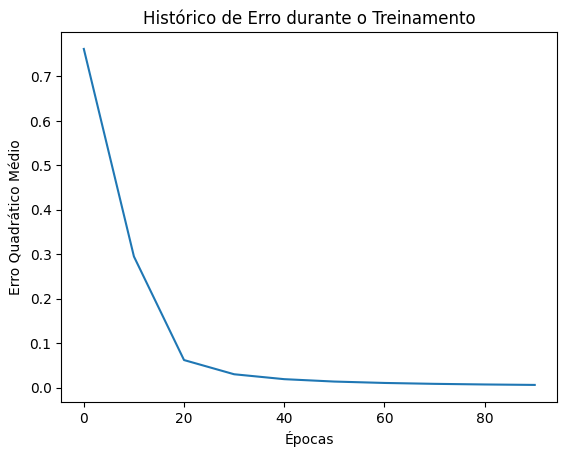

None
[[-0.98272894]
 [-0.93081692]
 [-0.93094113]
 [ 0.892373  ]]
[[-1.]
 [-1.]
 [-1.]
 [ 1.]]


In [83]:

# Treinamento do modelo
model = MLP(tamanho_entrada = 2, tamanho_escondida = 1, tamanho_saida = 1)
print(model.train(X= X,y= y, epochs= 100, taxa_aprendizado= 0.1))

# Chamada da execucao do algoritmo treinado
a = model.feedforward(X)
print(a)
print(np.round(a))


###Problema do OR

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/problemOR.csv", header=None, prefix='c')

# Criando vetores
X = df.iloc[:, :-1].values  # Seleciona todas as colunas, exceto a última, para X
y_raw = df.iloc[:, -1].values  # Seleciona a última coluna para y

# Formatando y como uma matriz de coluna
y = y_raw.reshape(-1, 1)


<ipython-input-78-c68ca407501b>:2: FutureWarning: The prefix argument has been deprecated and will be removed in a future version. Use a list comprehension on the column names in the future.


  df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/problemOR.csv", header=None, prefix='c')


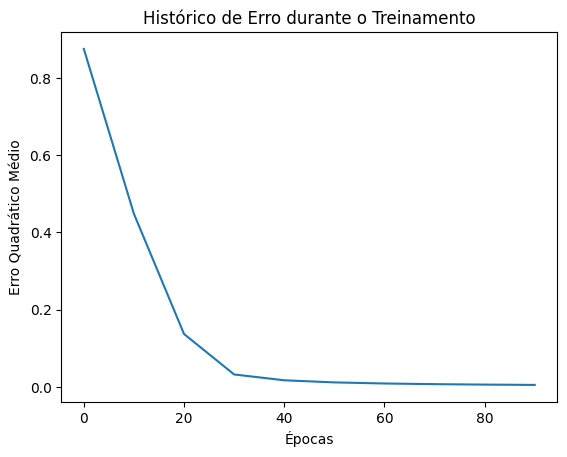

None
[[-0.89545127]
 [ 0.94527021]
 [ 0.93502319]
 [ 0.98138615]]
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]]


In [ ]:

# Treinamento do modelo
model = MLP(tamanho_entrada = 2, tamanho_escondida = 1, tamanho_saida = 1)
print(model.train(X= X,y= y, epochs= 100, taxa_aprendizado= 0.1))

# Chamada da execucao do algoritmo treinado
a = model.feedforward(X)
print(a)
print(np.round(a))


###Problema do XOR

In [ ]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/problemXOR.csv", header=None, prefix='c')

# Criando vetores
X = df.iloc[:, :-1].values  # Seleciona todas as colunas, exceto a última, para X
y_raw = df.iloc[:, -1].values  # Seleciona a última coluna para y

# Formatando y como uma matriz de coluna
y = y_raw.reshape(-1, 1)

# Verificando as dimensões
print("Dimensões de X:", X.shape)
print("Dimensões de y:", y.shape)


In [ ]:

# Treinamento do modelo
model = MLP(tamanho_entrada = 2, tamanho_escondida = 3, tamanho_saida = 1)
model.train(X= X,y= y, epochs= 500, taxa_aprendizado= 0.1)

# Chamada da execucao do algoritmo treinado
a = model.feedforward(X)
print(a)
print(np.round(a))


## Caracteres

### Sem Validação Cruzada

#### Sem Parada Antecipada

In [184]:
# Importando arquivos
df = pd.read_csv("https://raw.githubusercontent.com/julioferreirah/Trabalho-IA/main/caracteres-limpo.csv", header=None)

# Criando vetores
X = df.iloc[:, :-7].values  # Seleciona todas as colunas, exceto as 7 últimas, para X - dados
y = df.iloc[:, -7:].values  # Seleciona as 7 últimas coluna para y - resposta



array([[-1, -1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1, -1],
       [-1, -1,  1, ...,  1,  1, -1],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1, -1, -1],
       [ 1,  1,  1, ..., -1,  1,  1]])

In [ ]:

# Treinamento do modelo
model = MLP(tamanho_entrada = 2, tamanho_escondida = 3, tamanho_saida = 1)
model.train(X= X,y= y, epochs= 500, taxa_aprendizado= 0.1)

# Chamada da execucao do algoritmo treinado
a = model.feedforward(X)
print(a)
print(np.round(a))
